In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip uninstall -y pandas numpy
!pip install pandas==1.5.3 numpy==1.23.5


Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
Found existing installation: numpy 2.2.4
Uninstalling numpy-2.2.4:
  Successfully uninstalled numpy-2.2.4
  Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 73.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you hav

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

Missing Values:
age               0
workclass         0
fnlwgt            0
ed

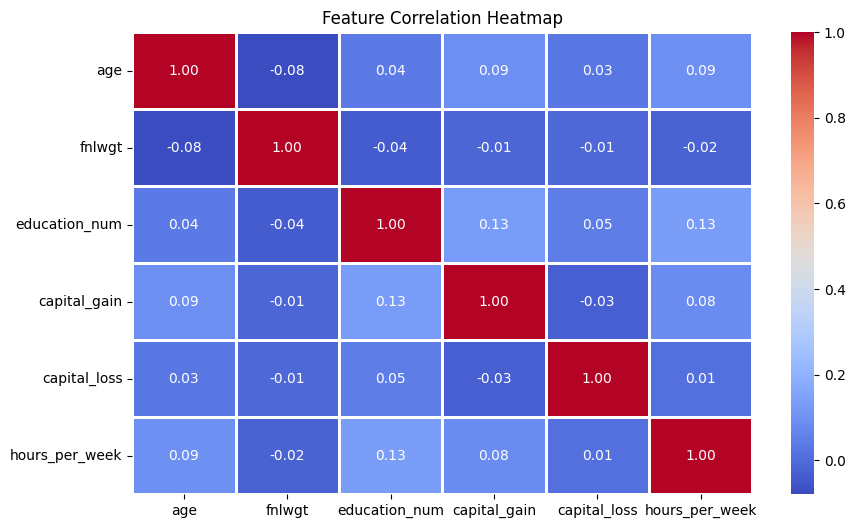

✅ Processed dataset saved!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest

# Load dataset
file_path = "/content/drive/MyDrive/adult_with_headers.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Data Exploration
print("Dataset Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Scaling
scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()
num_features = df.select_dtypes(include=['int64', 'float64']).columns
df_standard_scaled = df.copy()
df_minmax_scaled = df.copy()
df_standard_scaled[num_features] = scaler_std.fit_transform(df[num_features])
df_minmax_scaled[num_features] = scaler_minmax.fit_transform(df[num_features])

# Encoding
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    if df[col].nunique() <= 5:
        df = pd.get_dummies(df, columns=[col], drop_first=True)
    else:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Feature Engineering
# Example: Creating an interaction feature and binning age
df['capital_diff'] = df['capital_gain'] - df['capital_loss']
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'Senior'])

# Log transformation for skewed feature
df['log_capital_gain'] = np.log1p(df['capital_gain'])

# Outlier Detection with Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_preds = iso_forest.fit_predict(df[num_features])
df['outlier'] = outlier_preds
df = df[df['outlier'] == 1].drop(columns=['outlier'])

# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title("Feature Correlation Heatmap")
plt.show()

# Save processed data
df.to_csv("/content/drive/MyDrive/adult_processed.csv", index=False)
print("✅ Processed dataset saved!")


In [ ]:
# Check column names to confirm the target variable
print(df.columns)


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White',
       'sex_ Male', 'income_ >50K', 'capital_diff', 'age_group',
       'log_capital_gain'],
      dtype='object')


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "/content/drive/MyDrive/adult_processed.csv"  # Update path as needed
df = pd.read_csv(file_path)

# Data Exploration (optional)
print("Dataset Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Convert 'age_group' to numerical using Label Encoding
le = LabelEncoder()
df['age_group'] = le.fit_transform(df['age_group'])

# Split the data into features (X) and target (y)
X = df.drop(columns=['income_ >50K'])  # Features
y = df['income_ >50K']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (Random Forest)
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30933 entries, 0 to 30932
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       30933 non-null  int64  
 1   workclass                 30933 non-null  int64  
 2   fnlwgt                    30933 non-null  int64  
 3   education                 30933 non-null  int64  
 4   education_num             30933 non-null  int64  
 5   marital_status            30933 non-null  int64  
 6   occupation                30933 non-null  int64  
 7   relationship              30933 non-null  int64  
 8   capital_gain              30933 non-null  int64  
 9   capital_loss              30933 non-null  int64  
 10  hours_per_week            30933 non-null  int64  
 11  native_country            30933 non-null  int64  
 12  race_ Asian-Pac-Islander  30933 non-null  int64  
 13  race_ Black               30933 non-null  int64

In [ ]:
import joblib

# Save the trained model
joblib.dump(model, 'final_model.pkl')

# To load the model later:
loaded_model = joblib.load('final_model.pkl')
